<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/ConsumerSurplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("evd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


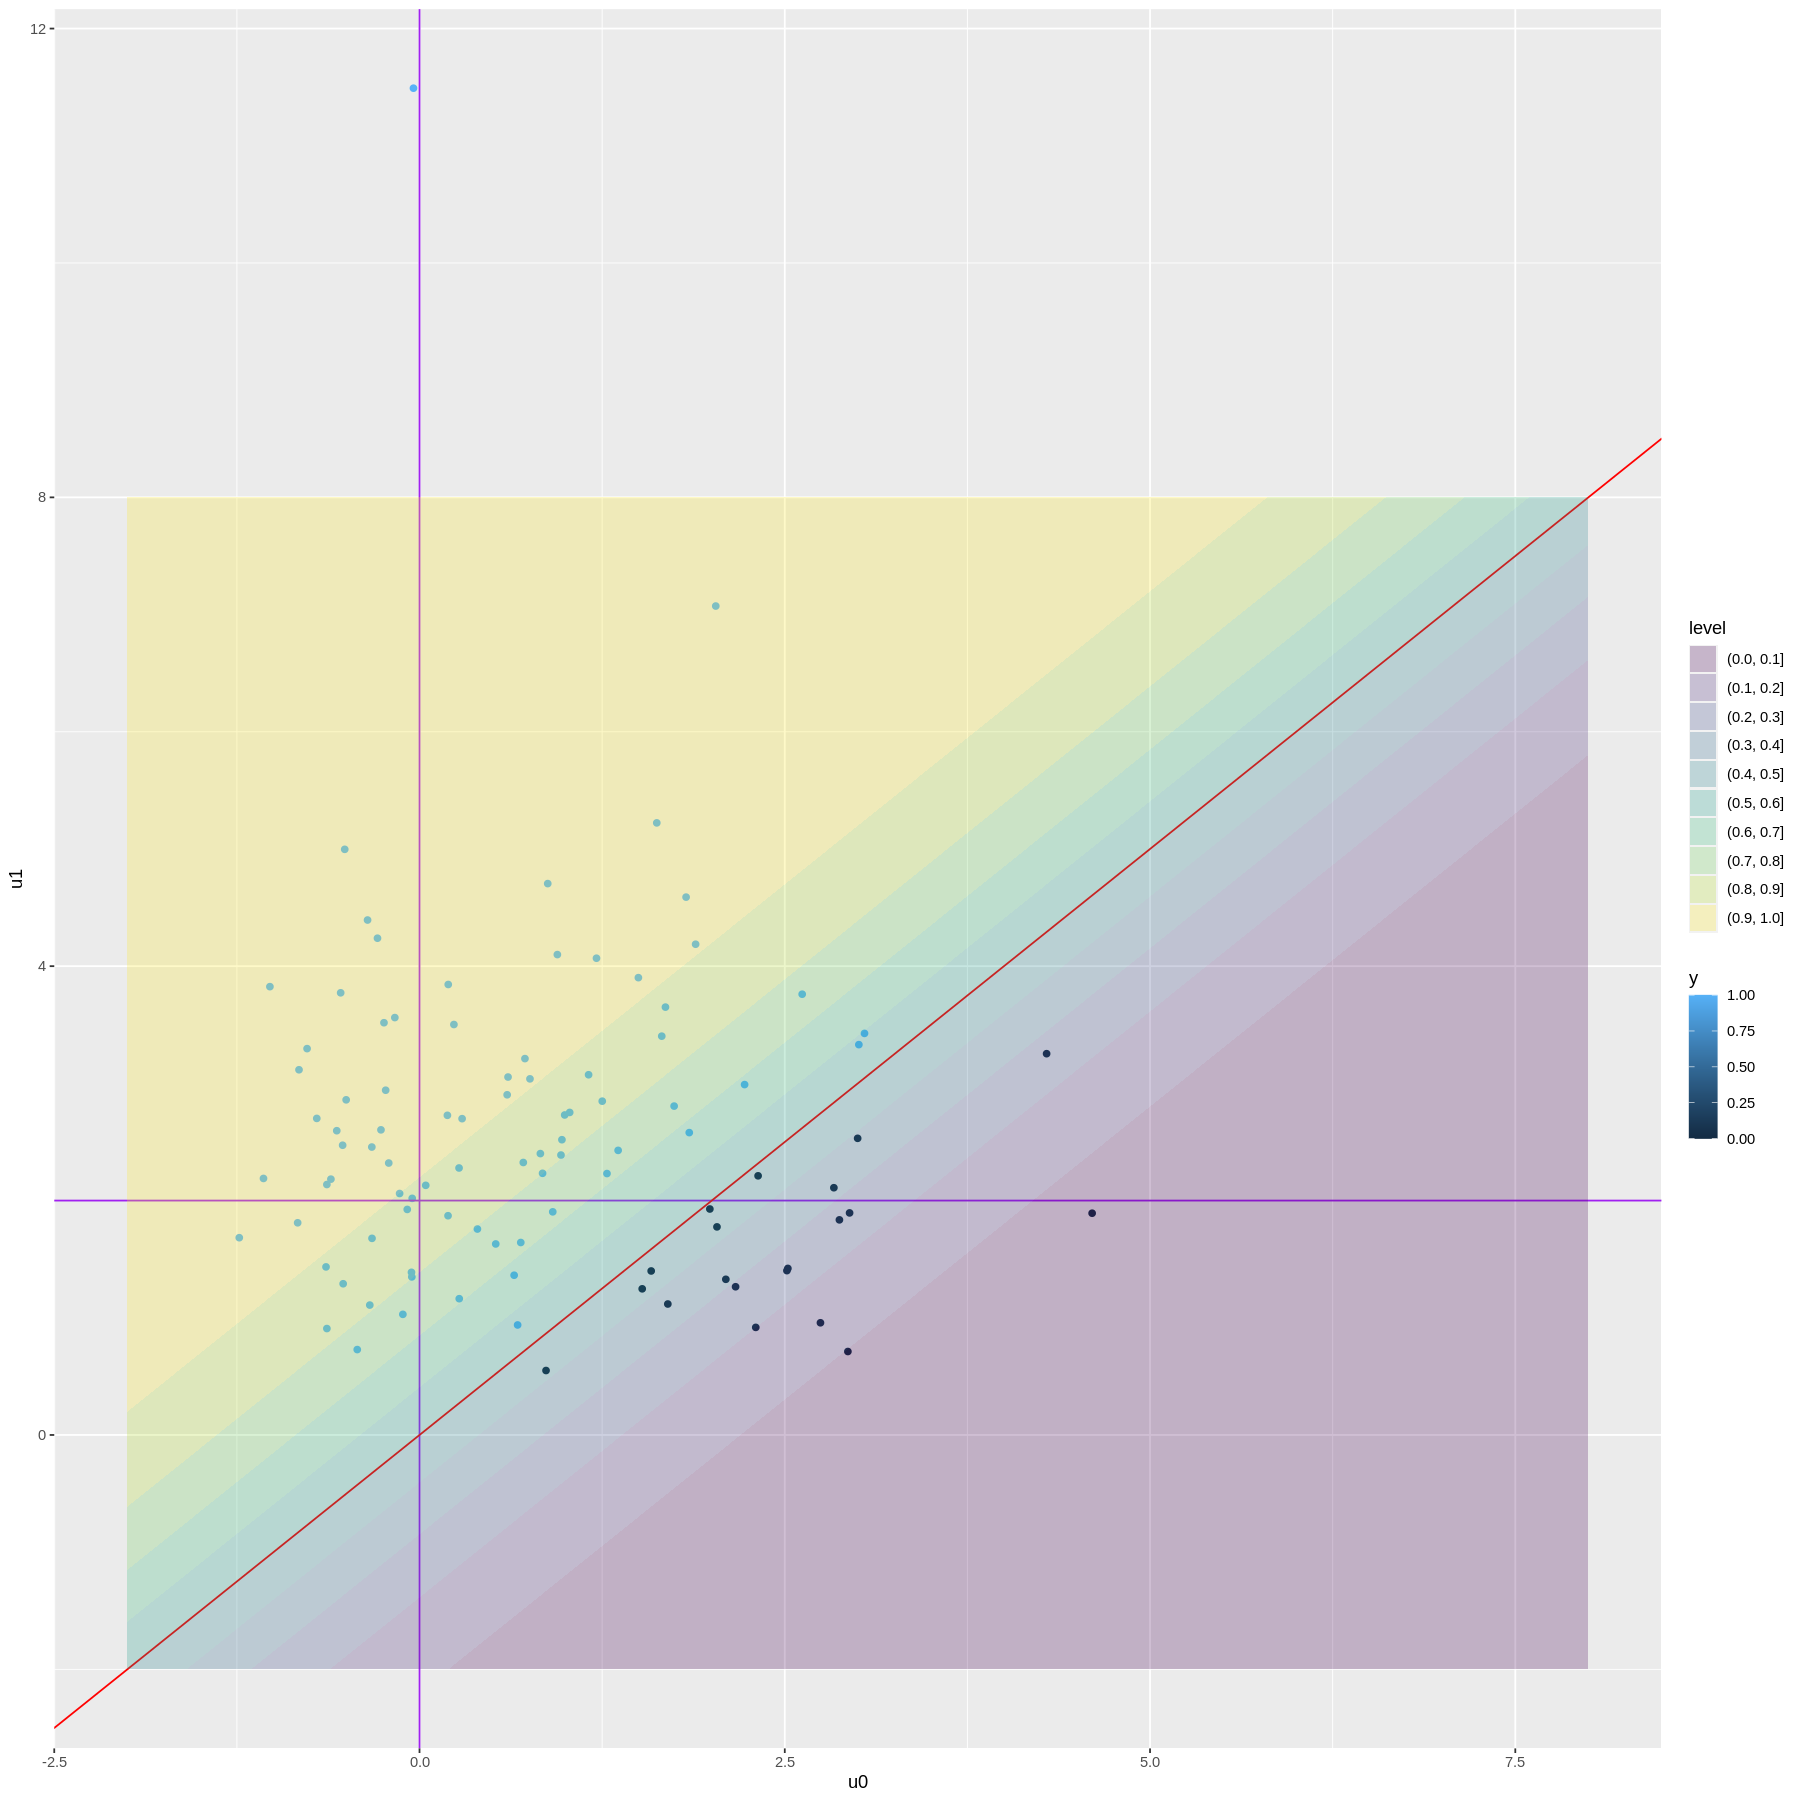

In [2]:
library(evd)
library(ggplot2)

e1 <- rgumbel(100)
e0 <- rgumbel(100)

d1 <- 2 # play with this one
d0 <- 0

y <- as.integer(d1 + e1 > d0 + e0)

e00s <- seq(-2, 8, length.out = 100)
e10s <- seq(-2, 8, length.out = 100)
fe <- expand.grid(x = e00s, y = e10s)
fe$val <- plogis(-fe$x + fe$y)

data <- data.frame(u1 = d1 + e1, u0 = d0 + e0, y = y)

base <- ggplot(data, aes(y = u1, x = u0, color = y)) +
  geom_point() +
  geom_vline(xintercept = d0, color = "purple") +
  geom_hline(yintercept = d1, color = "purple") +
  geom_abline(slope = 1, intercept = 0, color = "red")

options(repr.plot.width = 15, repr.plot.height = 15)

final_plot <- base +
     geom_contour_filled(data = fe, aes(x = x, y = y, z = val), alpha = 0.25)

final_plot

## Consumer Surplus
1. Contour level: proportion of people opting for option 1 i.e. $P(\xi \leq \delta_1)$
2. Purple vertical line: Mean utility of the outside option $ \delta_0 = 0$ (normalised to zero)
3. Purple horizontal line: Mean utility $ \delta_1 $
4. The red line is the Bayesian Decision Boundary

## Interpretation
* If there is high mean utility of option 1, there needs to be a very large idiosyncratic distaste for option 1 relative to the outside option to choose the latter.
* At $ \delta_1 = \delta_0 $ we can read off $ P(Y=1 | X) = F_{\xi}(\delta_1) $.
* The expected (to the analyst, not knowing $ \varepsilon's $) consumer surplus is the area of the rectangle $ [0, \delta_1] $ with height equal $ F_{\xi}(\delta_1) $.


We haven't plotted $ X $ here because we didn't have any dimensions left.

## Counterfactual analysis
We will now make $ \delta $ a function of $ x $.
1. Let $ \delta_{\beta}(x) = \beta_0 - \beta_1 x $ where $ x = \text{price}_{1} $ and $ \beta_1 > 0 $.
2. There is a new policy that increases the price by $ \Delta > 0 $.
3. The new mean utility is thus lower: $\delta_{\beta}(x + \Delta) < \delta_{\beta} (x) $.
4. Everything else equal (ceteris paribus), more people will choose the outside option (there is an income and a substitution effect)
5. Average welfare will decrease, we can calculate the exact quantity

$$ \text{WelfareChange}(\beta|x) = \delta_{\beta}(x)\Lambda(\delta_{\beta}(x)) - \delta_{\beta}(x + \Delta) \Lambda(\delta_{\beta}(x + \Delta)) < 0 $$

We replace $ \beta $ by $ \widehat{\beta} $, our MLE estimator.

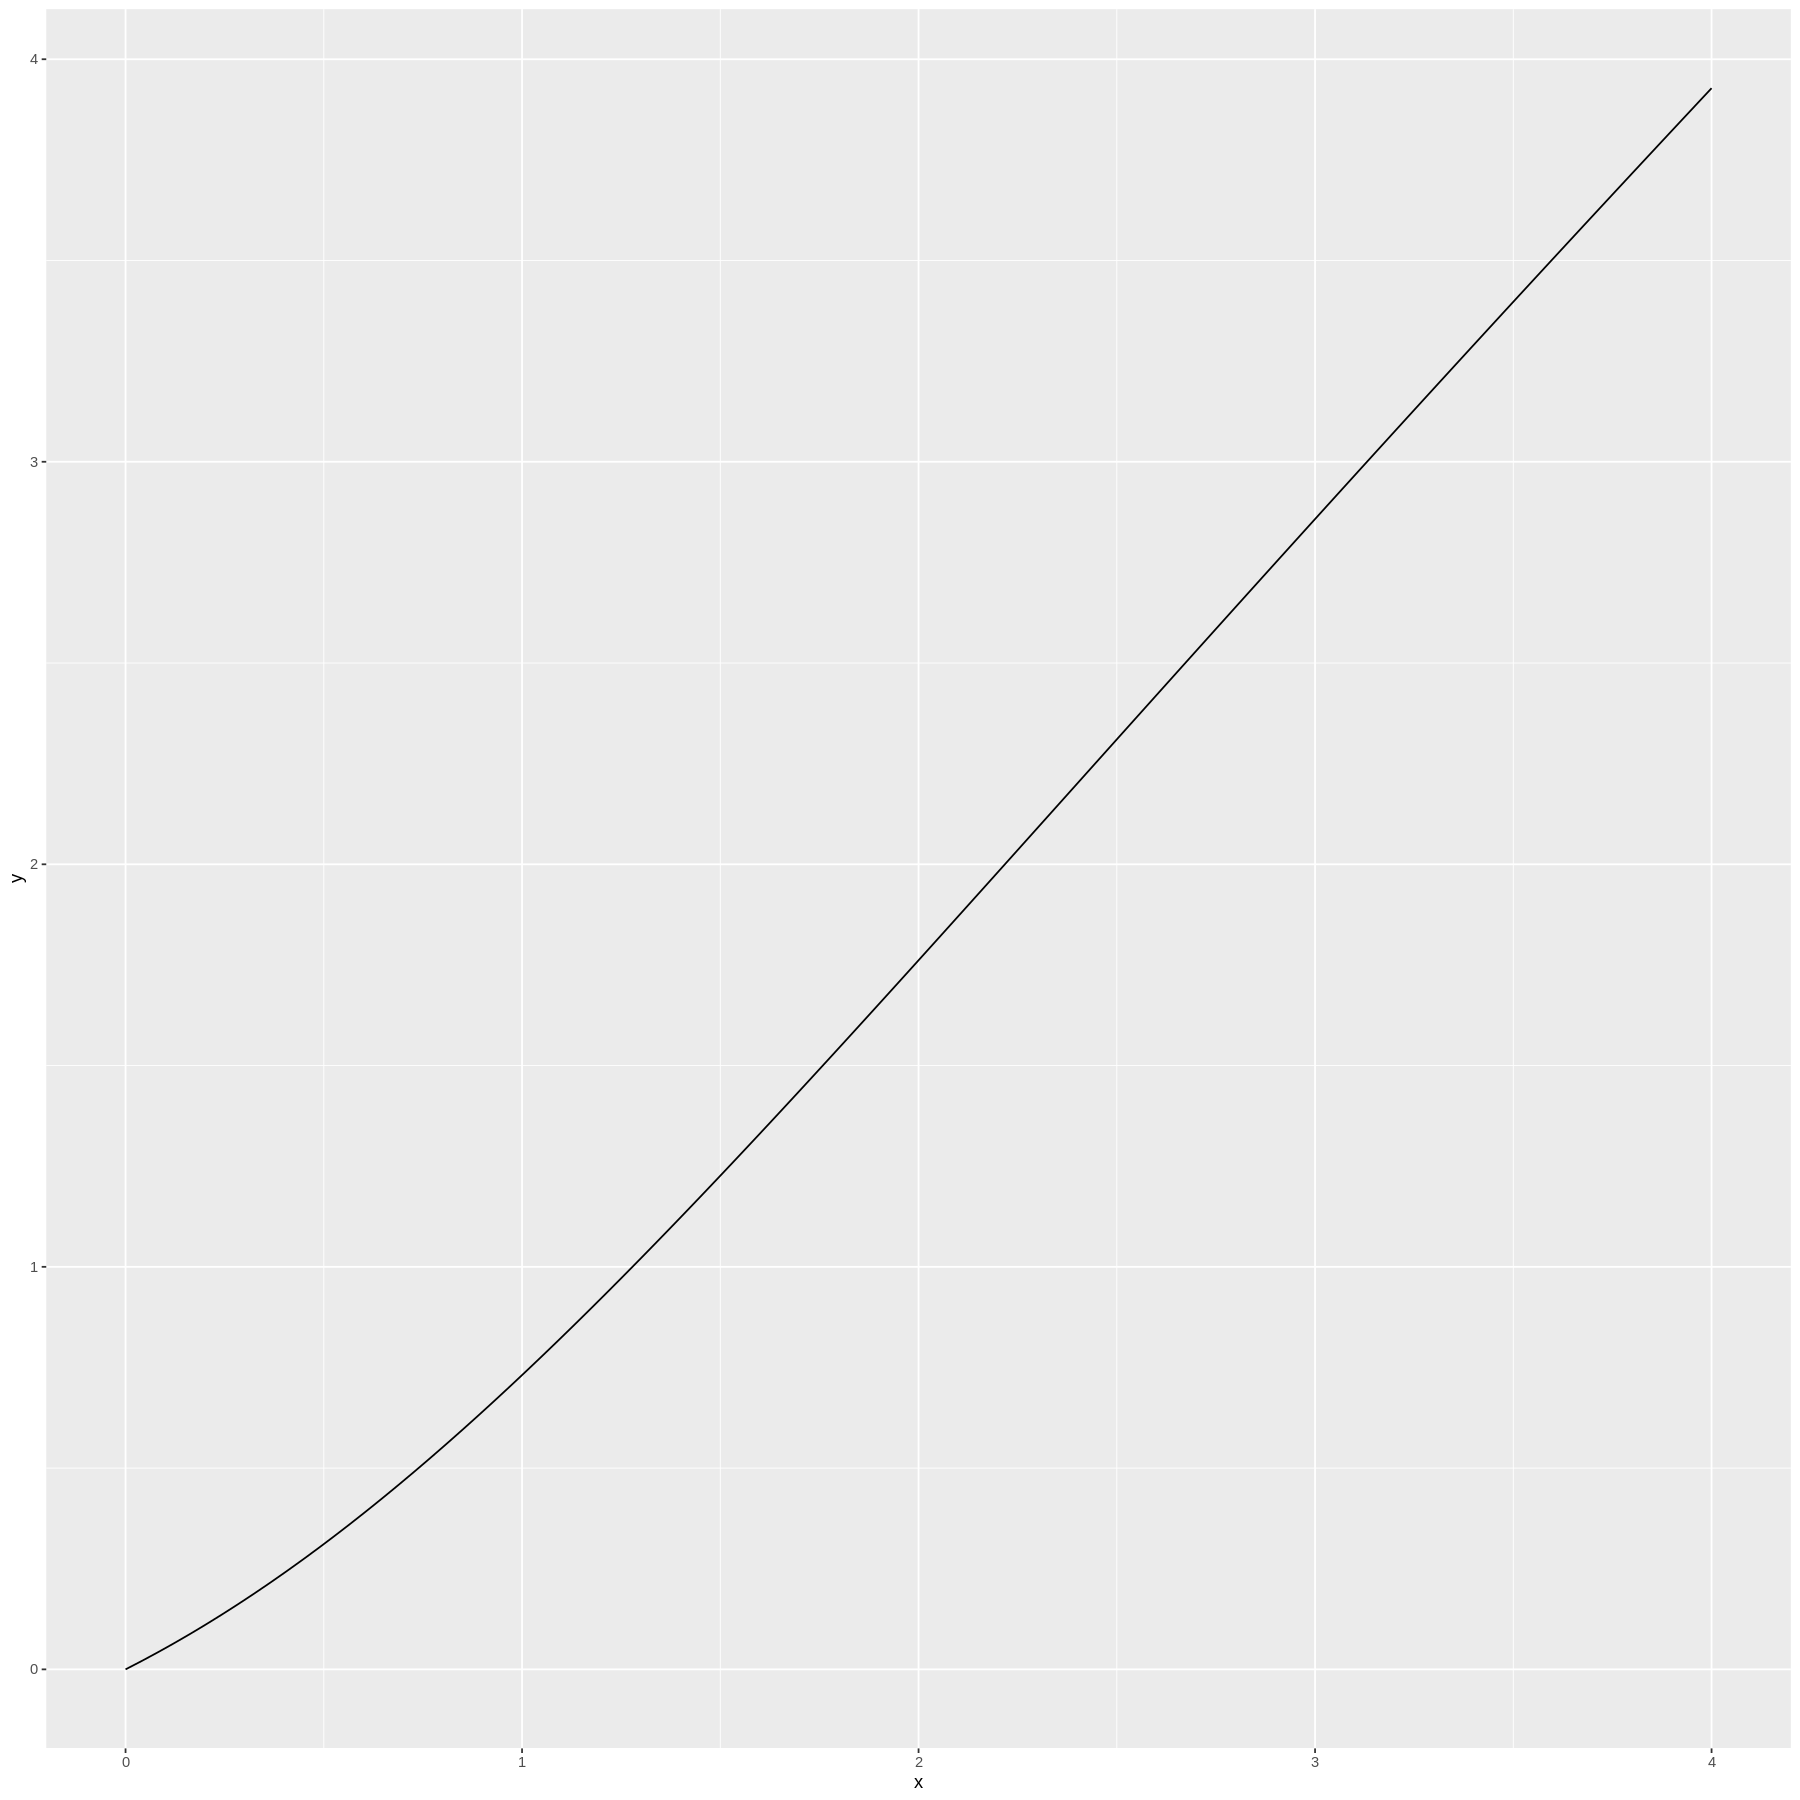

In [9]:
d10s <- seq(0, 4, length.out = 100)
ggplot(data.frame(x = d10s, y = plogis(d10s)*d10s)) +
  geom_line(aes(y = y, x = x))